Importing modules

In [90]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from numpy import genfromtxt
import sympy as smp
import decimal
import pandas as pd
import sympy as smp
from decimal import *

Importing data from csv file and Storing them in arrays [f - NQR Frequency T - Temperature]

In [1]:
data = genfromtxt('TempDep.csv', delimiter=",")[1:]
f = np.array(data[:,1:]).flatten()
T = np.array(data[:,:1]).flatten()


NameError: name 'genfromtxt' is not defined

Plotting T vs f from above data

(0.0, 310.0)

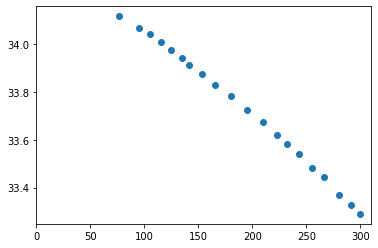

In [99]:
inter = interp1d(f, T, kind='linear')
plt.scatter(T, f)
plt.xlabel('Temperature [K]')
plt.ylabel('Frequency [MHz]')
plt.xlim(0,310)

4th order polynomial approximation to obtain value of $\nu_0$

In [112]:
z = np.polyfit(T,f,4)
p = np.poly1d(z)
print(np.poly1d(p))

            4             3             2
-5.861e-11 x + 4.251e-08 x - 1.464e-05 x - 0.001155 x + 34.28


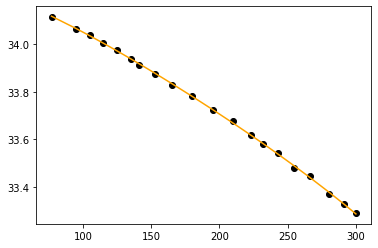

In [113]:
plt.plot(T, p(T), color = 'orange')
plt.scatter(T, f, color = 'black')


Initializing the constants

$A_x, A_y$ - Moment of inertia 

In [101]:
vo =34.225
k = 1.38 * 10 ** (-16)
h = 6.626 * 10 **(-27)
pi = np.pi
fx = np.arange(11, 101,1, dtype = 'float64') 
Ax = 791.32 * 10**-40
Ay = 577.50 * 10**-40
c = 3 * 10**10
vo

34.225

$a = \frac{3h}{8\pi^2c} \\ f_y = f_x \sqrt(\frac{A_x}{A_y}) $

 $e_x = \frac{1}{2} + \frac{1}{e^(\frac{hcf_{x_i}}{kT_j})-1} \\ e_y = \frac{1}{2} + \frac{1}{e^(\frac{hcf_{y_i}}{kT_j})-1}$

$ \begin{align}  I_x &  = \frac{a}{A_xf_{x_i}}e_x \\ & = \frac{\frac{3h}{8\pi^2c}}{A_xf_{x_i}} (\frac{1}{2} + \frac{1}{e^(\frac{hcf_{x_i}}{kT_j})-1} ) \end{align}
$ 
$\begin{align} I_y & =\frac{a}{A_yf_{y_i}}e_y  \\ & =  \frac{\frac{3h}{8\pi^2c}}{A_yf_{y_i}} (\frac{1}{2} + \frac{1}{e^(\frac{hcf_{y_i}}{kT_j})-1} ) \end{align}$

In [102]:
a = 3 * h / ( 8 * pi**2 * c)
ratioIxIy = np.sqrt(Ax/Ay)
fy = fx * ratioIxIy

#Initializing arrays to store the results
IX = np.empty(np.size(f))
IY = np.empty(np.size(f))
rr = np.empty((np.size(f), np.size(fx)))
res = np.empty(np.size(f))

#Creating/ opening an output text file to store results
op = open('Output.txt', 'w')
op.seek(0)
op.truncate()

#Function to calculate the result

def sum():
    for j in range(np.size(f)):
        temp = []
        error = []
        f1 = []
        f2  = []
        result = []
        op = open('Output.txt', 'a')
        IX = np.empty(np.size(f))
        IY = np.empty(np.size(f))
        for i in range(np.size(fx)):
            ex = 0.5 + 1 / ( np.exp( ( h * c * fx[i] ) / ( k * T[j] ) ) - 1 )
            ey = 0.5 + 1 / ( np.exp( ( h * c * fy[i] ) / ( k * T[j] ) ) - 1 )
            IX = a / ( Ax * fx[i] ) * ex
            IY = a / ( Ay * fy[i] ) * ey
            rhs = vo * (1 - IX - IY)
            er = rhs - f[j]
            result.append(rhs)
            error.append(er)
            print(f" T: {T[j]} RHS : {rhs} Error: {error[i]}  fx: {fx[i]} fy: {fy[i]}",file = op)
            temp.append(T[j])
            f1.append(fx[i])
            f2.append(fy[i])
     
        for z, ind in zip(np.abs(error), range(np.size(error))):
            if(min(np.abs(error)) == z):
                print(f"Temp = {T[j]} min error: {np.abs(z)}  rhs: {rhs}  fx: {f1[ind]} fy: {f2[ind]}")

        print(f" T: {T[j]} RHS : {rhs} Error: {min(np.abs(error))}  fx: {fx[i]} fy: {fy[i]}",file = op)
        
   
    
        
op.close()

In [103]:
sum()


Temp = 77.0 min error: 0.0012248404502841481  rhs: 34.17364560510304  fx: 64.0 fy: 74.9169435635253
Temp = 95.0 min error: 0.0013361146068433527  rhs: 34.166727992184455  fx: 57.0 fy: 66.72290286126471
Temp = 105.0 min error: 0.000649077415324939  rhs: 34.16260494415577  fx: 55.0 fy: 64.38174837490455
Temp = 115.0 min error: 0.0019821076443093943  rhs: 34.158338251669264  fx: 53.0 fy: 62.040593888544386
Temp = 125.0 min error: 0.001795769602836117  rhs: 34.153958251283434  fx: 51.0 fy: 59.69943940218422
Temp = 135.0 min error: 0.005060081864620258  rhs: 34.14948755306491  fx: 50.0 fy: 58.528862159004134
Temp = 141.0 min error: 0.0017967806829233268  rhs: 34.146768898794576  fx: 48.0 fy: 56.18770767264397
Temp = 153.0 min error: 0.00557083925504287  rhs: 34.14126381581469  fx: 47.0 fy: 55.01713042946389
Temp = 165.0 min error: 0.004306710450201479  rhs: 34.135683683361194  fx: 46.0 fy: 53.846553186283806
Temp = 180.0 min error: 0.00918577507778906  rhs: 34.128624518314645  fx: 46.0 fy: 